# Term Frequency Bi & Trigrams

Objective: Reliably pull restaurant names from unstructured text data of BlogTO -> Latest Eat & Drink articles


# Article 1 Test: Gusto 101
https://www.blogto.com/eat_drink/2019/09/gusto-501-italian-toronto/

In [76]:
article1 = open("article1.txt", "r")

#Read doc, print contents
article1Txt = article1.read()
print(article1Txt)

One of Toronto's favourite Italian restaurants is opening a new multi-level location

The people behind Gusto 101, known for serving some of the best Italian food in the city, will soon be opening an innovative five-level location.

Dubbed Gusto 501 and located at 501 King East, the five levels will comprise an open-concept ground floor dining room, semi-private amari lounge, cocktail bar, a chef tasting kitchen called "Attico" on the top floor and a seasonal rooftop patio. Expect favourites from the Gusto 101 menu, as well as new spins on contemporary Italian.

"When we purchased the property almost five years ago, I had this gut feeling. There was something special about this neighbourhood that felt exciting, undiscovered. I took a chance on Corktown, believing it would be the ideal home for our next big project," said Janet Zuccarini, CEO and Owner of Gusto 54 Restaurant Group.

Formerly home to an auto body shop, the towering new space will come with custom terracotta brick walls a

In [77]:
#Normalize text
from string import punctuation

#remove punctuation and make lower case
article1Txt= ''.join(c for c in article1Txt if c not in punctuation).lower()

#Print normalized text
print(article1Txt)

one of torontos favourite italian restaurants is opening a new multilevel location

the people behind gusto 101 known for serving some of the best italian food in the city will soon be opening an innovative fivelevel location

dubbed gusto 501 and located at 501 king east the five levels will comprise an openconcept ground floor dining room semiprivate amari lounge cocktail bar a chef tasting kitchen called attico on the top floor and a seasonal rooftop patio expect favourites from the gusto 101 menu as well as new spins on contemporary italian

when we purchased the property almost five years ago i had this gut feeling there was something special about this neighbourhood that felt exciting undiscovered i took a chance on corktown believing it would be the ideal home for our next big project said janet zuccarini ceo and owner of gusto 54 restaurant group

formerly home to an auto body shop the towering new space will come with custom terracotta brick walls and an allglass facade that w

In [78]:
#Remove stopwords
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
article1Txt = ' '.join([word for word in article1Txt.split() if word not in (stopwords.words('english'))])
print(article1Txt)

[nltk_data] Downloading package stopwords to /home/nbuser/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
one torontos favourite italian restaurants opening new multilevel location people behind gusto 101 known serving best italian food city soon opening innovative fivelevel location dubbed gusto 501 located 501 king east five levels comprise openconcept ground floor dining room semiprivate amari lounge cocktail bar chef tasting kitchen called attico top floor seasonal rooftop patio expect favourites gusto 101 menu well new spins contemporary italian purchased property almost five years ago gut feeling something special neighbourhood felt exciting undiscovered took chance corktown believing would ideal home next big project said janet zuccarini ceo owner gusto 54 restaurant group formerly home auto body shop towering new space come custom terracotta brick walls allglass facade create illusion floating levels designed architecture interiors partisans responsible bar 

In [79]:
#Tokenization and count into individual words
import nltk
import pandas as pd
from nltk.probability import FreqDist
nltk.download ("punkt")

words = nltk.tokenize.word_tokenize(article1Txt)


[nltk_data] Downloading package punkt to /home/nbuser/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [80]:
#Frequency distribution of words into a dataframe
fdist = FreqDist(words)
count_frame = pd.DataFrame(fdist, index = [0]).T
count_frame.columns = ['Count']
print (count_frame)


              Count
one               1
torontos          1
favourite         1
italian           3
restaurants       1
opening           2
new               3
multilevel        1
location          2
people            1
behind            1
gusto             5
101               2
known             1
serving           1
best              1
food              2
city              1
soon              1
innovative        1
fivelevel         1
dubbed            1
501               3
located           1
king              1
east              1
five              2
levels            2
comprise          1
openconcept       1
...             ...
terracotta        1
brick             1
walls             1
allglass          1
facade            1
create            1
illusion          1
floating          1
designed          1
architecture      1
interiors         1
partisans         1
responsible       1
raval             1
union             1
station           1
court             1
interior          1


In [103]:
# Get the frequency distribution of the remaining words
fdist = FreqDist(words)
count_frame = pd.DataFrame(fdist, index =[0]).T
count_frame.columns = ['Count']


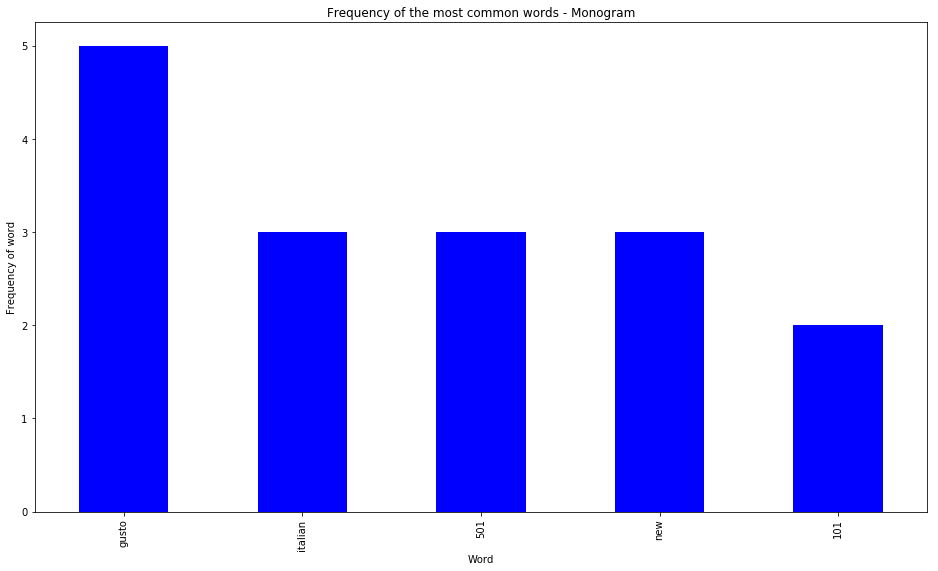

In [104]:
# Plot the frequency of the top 5 words
%matplotlib inline
import matplotlib.pyplot as plt

counts = count_frame.sort_values('Count', ascending = False)
fig = plt.figure(figsize=(16, 9))
ax = fig.gca()    
counts['Count'][:5].plot(kind = 'bar', ax = ax, color="blue")
ax.set_title('Frequency of the most common words - Monogram')
ax.set_ylabel('Frequency of word')
ax.set_xlabel('Word')
plt.show()

# Bigrams

In [97]:
import nltk
from nltk import word_tokenize
from nltk.util import ngrams

token=nltk.word_tokenize(article1Txt)
bigrams=ngrams(token,2)

In [98]:
#Frequency distribution of Bigrams into a dataframe
fdist = FreqDist(bigrams)
count_frame = pd.DataFrame(fdist, index = [0]).T
count_frame.columns = ['Count']
print (count_frame)

                           Count
one          torontos          1
torontos     favourite         1
favourite    italian           1
italian      restaurants       1
restaurants  opening           1
opening      new               1
new          multilevel        1
multilevel   location          1
location     people            1
people       behind            1
behind       gusto             1
gusto        101               2
101          known             1
known        serving           1
serving      best              1
best         italian           1
italian      food              1
food         city              1
city         soon              1
soon         opening           1
opening      innovative        1
innovative   fivelevel         1
fivelevel    location          1
location     dubbed            1
dubbed       gusto             1
gusto        501               2
501          located           1
located      501               1
501          king              1
king      

In [105]:
# Get the frequency distribution of the remaining bigrams
token=nltk.word_tokenize(article1Txt)
bigrams=ngrams(token,2)
fdist = FreqDist(bigrams)
count_frame = pd.DataFrame(fdist, index =[0]).T
count_frame.columns = ['Count']


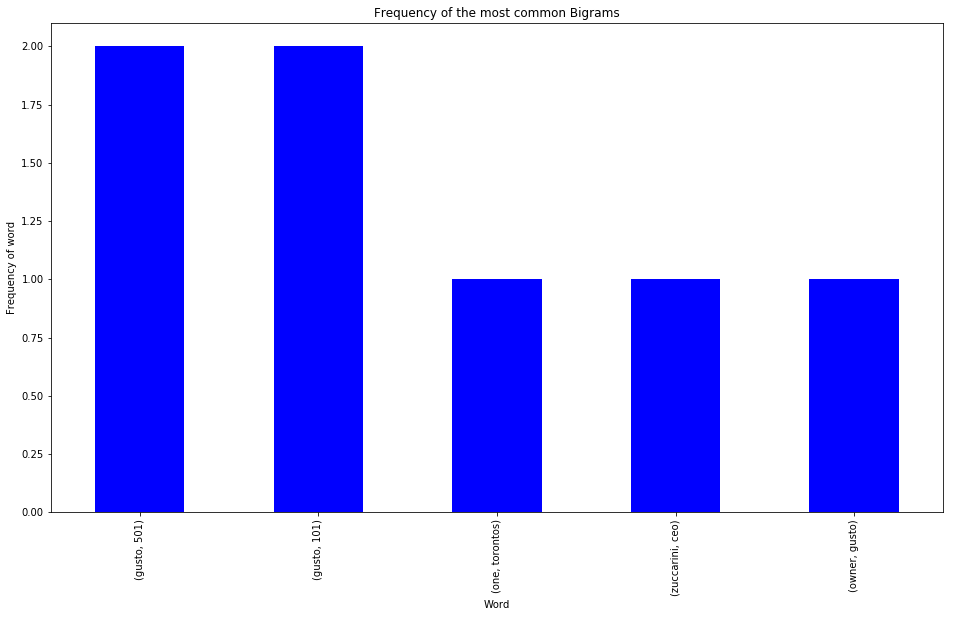

In [106]:
# Plot the frequency of the top 5 bigrams
%matplotlib inline
import matplotlib.pyplot as plt

counts = count_frame.sort_values('Count', ascending = False)
fig = plt.figure(figsize=(16, 9))
ax = fig.gca()    
counts['Count'][:5].plot(kind = 'bar', ax = ax, color="blue")
ax.set_title('Frequency of the most common Bigrams')
ax.set_ylabel('Frequency of word')
ax.set_xlabel('Word')
plt.show()

# Trigrams


In [107]:
import nltk
from nltk import word_tokenize
from nltk.util import ngrams

token=nltk.word_tokenize(article1Txt)
bigrams=ngrams(token,3)

In [108]:
#Frequency distribution of Bigrams into a dataframe
fdist = FreqDist(bigrams)
count_frame = pd.DataFrame(fdist, index = [0]).T
count_frame.columns = ['Count']
print (count_frame)

                                        Count
one          torontos     favourite         1
torontos     favourite    italian           1
favourite    italian      restaurants       1
italian      restaurants  opening           1
restaurants  opening      new               1
opening      new          multilevel        1
new          multilevel   location          1
multilevel   location     people            1
location     people       behind            1
people       behind       gusto             1
behind       gusto        101               1
gusto        101          known             1
101          known        serving           1
known        serving      best              1
serving      best         italian           1
best         italian      food              1
italian      food         city              1
food         city         soon              1
city         soon         opening           1
soon         opening      innovative        1
opening      innovative   fiveleve

In [109]:
# Get the frequency distribution of the remaining bigrams
token=nltk.word_tokenize(article1Txt)
bigrams=ngrams(token,3)
fdist = FreqDist(bigrams)
count_frame = pd.DataFrame(fdist, index =[0]).T
count_frame.columns = ['Count']


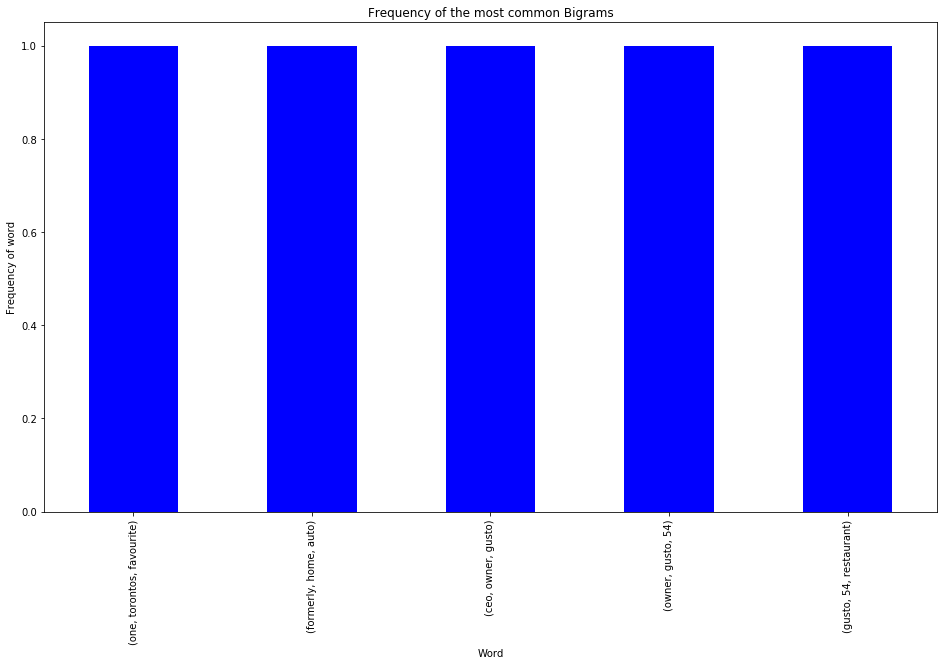

In [110]:
# Plot the frequency of the top 5 bigrams
%matplotlib inline
import matplotlib.pyplot as plt

counts = count_frame.sort_values('Count', ascending = False)
fig = plt.figure(figsize=(16, 9))
ax = fig.gca()    
counts['Count'][:5].plot(kind = 'bar', ax = ax, color="blue")
ax.set_title('Frequency of the most common Bigrams')
ax.set_ylabel('Frequency of word')
ax.set_xlabel('Word')
plt.show()

# Article 2 Test: Machi Machi
https://www.blogto.com/eat_drink/2019/09/cheese-tea-machi-machi-toronto/

In [121]:
article2 = open("article2.txt", "r")

#Read doc, print contents
article2Txt = article2.read()
print(article2Txt)

Popular cheese tea chain Machi Machi just opened its first Toronto location

If you love cheese foam on your bubble tea, good news: Toronto now has a location of the world-famous boba spot, Machi Machi. 

The Taiwanese bubble tea chain has just opened a new store at 575 Yonge Street, making it the first Canadian location ever. 

Specializing in drinks with a super frothy, thick, cream cheese foam on top, Machi Machi stores across Asia have seen crazy lineups, well past their grand opening dates. 

That's probably thanks to endorsements from Asian megastars like Taiwanese singer Jay Chou.

Machi Machi also offer adorable bottles of two-layered drinks like strawberry milk and panna cotta. 

The Toronto store is in its opening phase now, so the first 100 customers from today until Sunday will be getting a free Machi Machi tote.

The next 100 after that will get a cool reusable cup bag, to show you're really about that bubble tea life.


In [122]:
#Normalize text
from string import punctuation

#remove punctuation and make lower case
article2Txt= ''.join(c for c in article2Txt if c not in punctuation).lower()

#Print normalized text
print(article2Txt)

popular cheese tea chain machi machi just opened its first toronto location

if you love cheese foam on your bubble tea good news toronto now has a location of the worldfamous boba spot machi machi 

the taiwanese bubble tea chain has just opened a new store at 575 yonge street making it the first canadian location ever 

specializing in drinks with a super frothy thick cream cheese foam on top machi machi stores across asia have seen crazy lineups well past their grand opening dates 

thats probably thanks to endorsements from asian megastars like taiwanese singer jay chou

machi machi also offer adorable bottles of twolayered drinks like strawberry milk and panna cotta 

the toronto store is in its opening phase now so the first 100 customers from today until sunday will be getting a free machi machi tote

the next 100 after that will get a cool reusable cup bag to show youre really about that bubble tea life


In [124]:
#Remove stopwords
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
article2Txt = ' '.join([word for word in article2Txt.split() if word not in (stopwords.words('english'))])
print(article2Txt)

[nltk_data] Downloading package stopwords to /home/nbuser/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
popular cheese tea chain machi machi opened first toronto location love cheese foam bubble tea good news toronto location worldfamous boba spot machi machi taiwanese bubble tea chain opened new store 575 yonge street making first canadian location ever specializing drinks super frothy thick cream cheese foam top machi machi stores across asia seen crazy lineups well past grand opening dates thats probably thanks endorsements asian megastars like taiwanese singer jay chou machi machi also offer adorable bottles twolayered drinks like strawberry milk panna cotta toronto store opening phase first 100 customers today sunday getting free machi machi tote next 100 get cool reusable cup bag show youre really bubble tea life


In [125]:
#Tokenization and count into individual words
import nltk
import pandas as pd
from nltk.probability import FreqDist
nltk.download ("punkt")

words = nltk.tokenize.word_tokenize(article2Txt)


[nltk_data] Downloading package punkt to /home/nbuser/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [126]:
#Frequency distribution of words into a dataframe
fdist = FreqDist(words)
count_frame = pd.DataFrame(fdist, index = [0]).T
count_frame.columns = ['Count']
print (count_frame)



              Count
popular           1
cheese            3
tea               4
chain             2
machi            10
opened            2
first             3
toronto           3
location          3
love              1
foam              2
bubble            3
good              1
news              1
worldfamous       1
boba              1
spot              1
taiwanese         2
new               1
store             2
575               1
yonge             1
street            1
making            1
canadian          1
ever              1
specializing      1
drinks            2
super             1
frothy            1
...             ...
singer            1
jay               1
chou              1
also              1
offer             1
adorable          1
bottles           1
twolayered        1
strawberry        1
milk              1
panna             1
cotta             1
phase             1
100               2
customers         1
today             1
sunday            1
getting           1


In [127]:
# Get the frequency distribution of the remaining words
fdist = FreqDist(words)
count_frame = pd.DataFrame(fdist, index =[0]).T
count_frame.columns = ['Count']


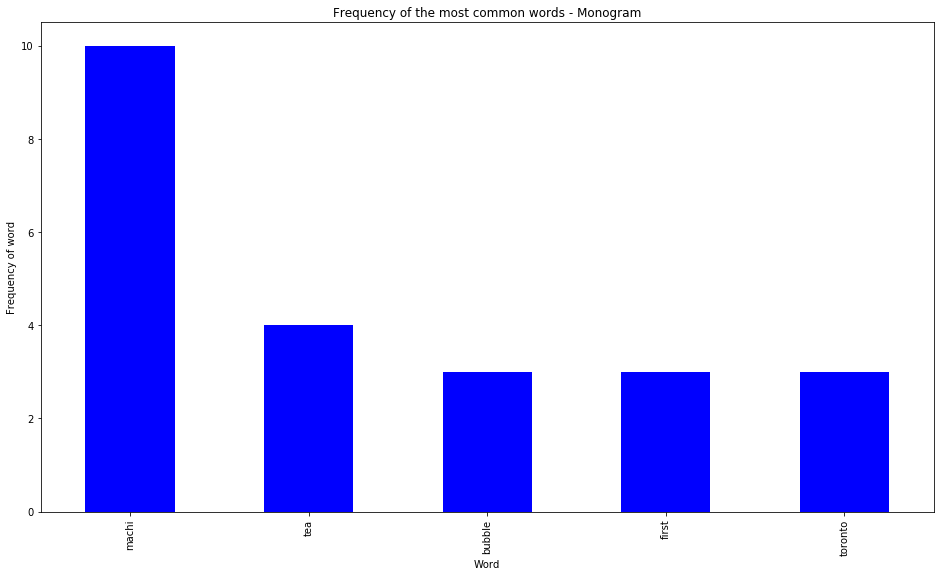

In [128]:
# Plot the frequency of the top 5 words
%matplotlib inline
import matplotlib.pyplot as plt

counts = count_frame.sort_values('Count', ascending = False)
fig = plt.figure(figsize=(16, 9))
ax = fig.gca()    
counts['Count'][:5].plot(kind = 'bar', ax = ax, color="blue")
ax.set_title('Frequency of the most common words - Monogram')
ax.set_ylabel('Frequency of word')
ax.set_xlabel('Word')
plt.show()

# Bigrams

In [131]:
import nltk
from nltk import word_tokenize
from nltk.util import ngrams

token=nltk.word_tokenize(article2Txt)
bigrams=ngrams(token,2)

In [132]:
#Frequency distribution of Bigrams into a dataframe
fdist = FreqDist(bigrams)
count_frame = pd.DataFrame(fdist, index = [0]).T
count_frame.columns = ['Count']
print (count_frame)

                         Count
popular     cheese           1
cheese      tea              1
tea         chain            2
chain       machi            1
machi       machi            5
            opened           1
opened      first            1
first       toronto          1
toronto     location         2
location    love             1
love        cheese           1
cheese      foam             2
foam        bubble           1
bubble      tea              3
tea         good             1
good        news             1
news        toronto          1
location    worldfamous      1
worldfamous boba             1
boba        spot             1
spot        machi            1
machi       taiwanese        1
taiwanese   bubble           1
chain       opened           1
opened      new              1
new         store            1
store       575              1
575         yonge            1
yonge       street           1
street      making           1
...                        ...
drinks  

In [135]:
# Get the frequency distribution of the remaining bigrams
token=nltk.word_tokenize(article2Txt)
bigrams=ngrams(token,2)
fdist = FreqDist(bigrams)
count_frame = pd.DataFrame(fdist, index =[0]).T
count_frame.columns = ['Count']


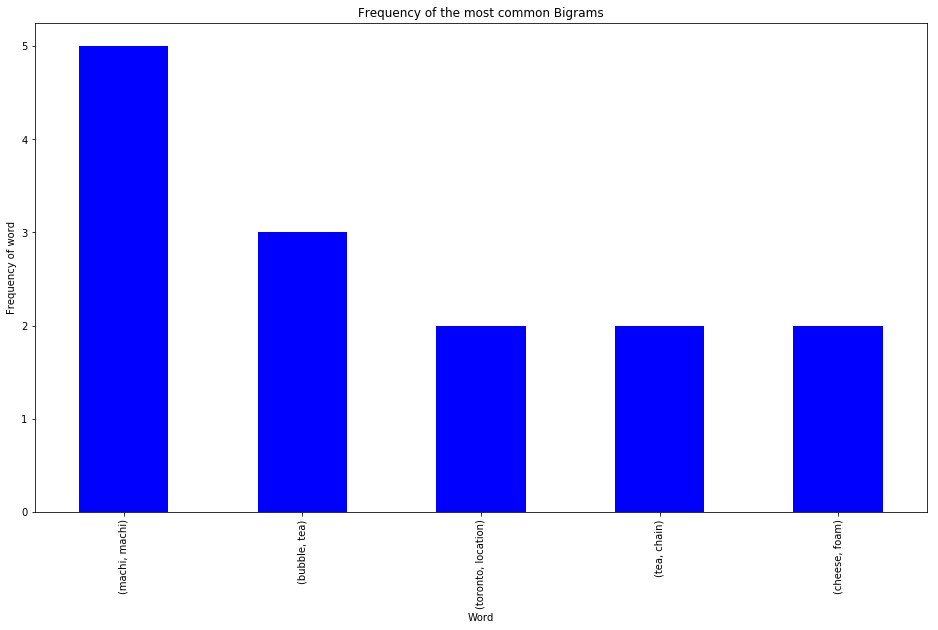

In [136]:
# Plot the frequency of the top 5 bigrams
%matplotlib inline
import matplotlib.pyplot as plt

counts = count_frame.sort_values('Count', ascending = False)
fig = plt.figure(figsize=(16, 9))
ax = fig.gca()    
counts['Count'][:5].plot(kind = 'bar', ax = ax, color="blue")
ax.set_title('Frequency of the most common Bigrams')
ax.set_ylabel('Frequency of word')
ax.set_xlabel('Word')
plt.show()

# Trigram

In [141]:
import nltk
from nltk import word_tokenize
from nltk.util import ngrams

token=nltk.word_tokenize(article2Txt)
trigrams=ngrams(token,3)

In [142]:
#Frequency distribution of Bigrams into a dataframe
fdist = FreqDist(trigrams)
count_frame = pd.DataFrame(fdist, index = [0]).T
count_frame.columns = ['Count']
print (count_frame)

                                     Count
popular     cheese      tea              1
cheese      tea         chain            1
tea         chain       machi            1
chain       machi       machi            1
machi       machi       opened           1
            opened      first            1
opened      first       toronto          1
first       toronto     location         1
toronto     location    love             1
location    love        cheese           1
love        cheese      foam             1
cheese      foam        bubble           1
foam        bubble      tea              1
bubble      tea         good             1
tea         good        news             1
good        news        toronto          1
news        toronto     location         1
toronto     location    worldfamous      1
location    worldfamous boba             1
worldfamous boba        spot             1
boba        spot        machi            1
spot        machi       machi            1
machi      

In [143]:
# Get the frequency distribution of the remaining trigrams
token=nltk.word_tokenize(article2Txt)
bigrams=ngrams(token,3)
fdist = FreqDist(bigrams)
count_frame = pd.DataFrame(fdist, index =[0]).T
count_frame.columns = ['Count']


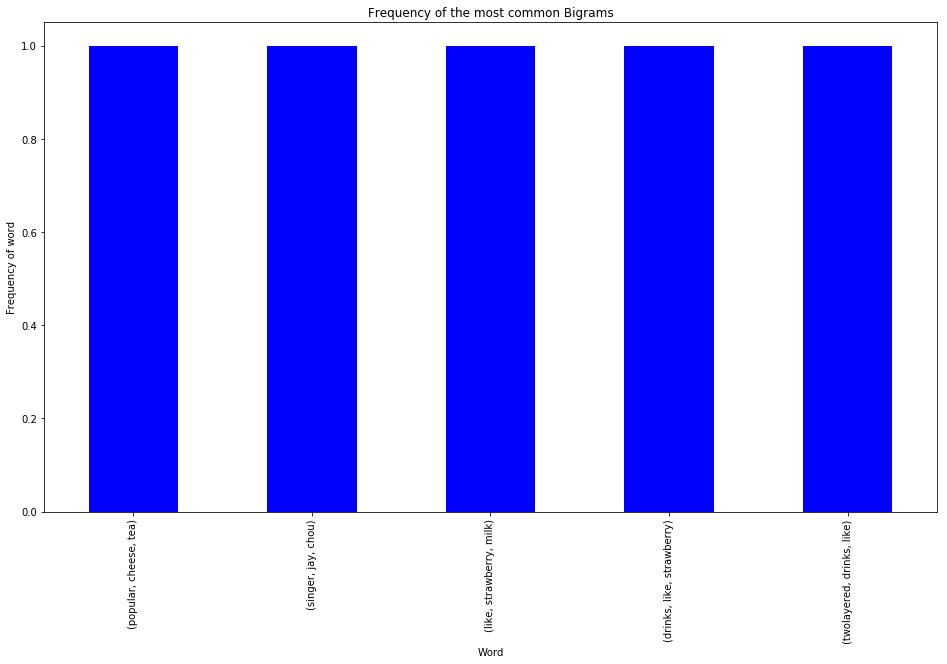

In [144]:
# Plot the frequency of the top 5 Trigrams
%matplotlib inline
import matplotlib.pyplot as plt

counts = count_frame.sort_values('Count', ascending = False)
fig = plt.figure(figsize=(16, 9))
ax = fig.gca()    
counts['Count'][:5].plot(kind = 'bar', ax = ax, color="blue")
ax.set_title('Frequency of the most common Bigrams')
ax.set_ylabel('Frequency of word')
ax.set_xlabel('Word')
plt.show()

# Article 3 Test: My Roti Place
https://www.blogto.com/eat_drink/2019/09/dollar-roti-toronto/

In [147]:
article7 = open("article7.txt", "r")

#Read doc, print contents
article7Txt = article7.read()
print(article7Txt)

You can get roti for only $1 in toronto next week

Roti has always been cheap for how filling and delicious it is, but it's been ages since you've been able to get it for prices as low as, say, a dollar.

Prepare to do a double take as My Roti Place is serving roti for only $1 next week in celebration of their one year anniversary. The chain with six locations specializes in roti with North Indian fillings.


This offer is only taking place at their 901 King West location. Choose between Butter Chicken, Paneer Butter (Vegetarian) and Channa Masala (Vegan) options for roti fillings.


It'll be a breakfast roti situation, however, as the deal is only taking place from 10:30 a.m. to noon on September 23. Also, don't expect to freeze roti for your dinner for the next month, as there's a limit of one per customer, and the deal is available exclusively in store.

When was the last time you felt full off a loonie? We'll wait.


In [148]:
#Normalize text
from string import punctuation

#remove punctuation and make lower case
article7Txt= ''.join(c for c in article7Txt if c not in punctuation).lower()

#Print normalized text
print(article7Txt)

you can get roti for only 1 in toronto next week

roti has always been cheap for how filling and delicious it is but its been ages since youve been able to get it for prices as low as say a dollar

prepare to do a double take as my roti place is serving roti for only 1 next week in celebration of their one year anniversary the chain with six locations specializes in roti with north indian fillings


this offer is only taking place at their 901 king west location choose between butter chicken paneer butter vegetarian and channa masala vegan options for roti fillings


itll be a breakfast roti situation however as the deal is only taking place from 1030 am to noon on september 23 also dont expect to freeze roti for your dinner for the next month as theres a limit of one per customer and the deal is available exclusively in store

when was the last time you felt full off a loonie well wait


In [149]:
#Remove stopwords
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
article7Txt = ' '.join([word for word in article7Txt.split() if word not in (stopwords.words('english'))])
print(article7Txt)

[nltk_data] Downloading package stopwords to /home/nbuser/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
get roti 1 toronto next week roti always cheap filling delicious ages since youve able get prices low say dollar prepare double take roti place serving roti 1 next week celebration one year anniversary chain six locations specializes roti north indian fillings offer taking place 901 king west location choose butter chicken paneer butter vegetarian channa masala vegan options roti fillings itll breakfast roti situation however deal taking place 1030 noon september 23 also dont expect freeze roti dinner next month theres limit one per customer deal available exclusively store last time felt full loonie well wait


In [150]:
#Tokenization and count into individual words
import nltk
import pandas as pd
from nltk.probability import FreqDist
nltk.download ("punkt")

words = nltk.tokenize.word_tokenize(article7Txt)

[nltk_data] Downloading package punkt to /home/nbuser/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [151]:
#Frequency distribution of words into a dataframe
fdist = FreqDist(words)
count_frame = pd.DataFrame(fdist, index = [0]).T
count_frame.columns = ['Count']
print (count_frame)

             Count
get              2
roti             8
1                2
toronto          1
next             3
week             2
always           1
cheap            1
filling          1
delicious        1
ages             1
since            1
youve            1
able             1
prices           1
low              1
say              1
dollar           1
prepare          1
double           1
take             1
place            3
serving          1
celebration      1
one              2
year             1
anniversary      1
chain            1
six              1
locations        1
...            ...
options          1
itll             1
breakfast        1
situation        1
however          1
deal             2
1030             1
noon             1
september        1
23               1
also             1
dont             1
expect           1
freeze           1
dinner           1
month            1
theres           1
limit            1
per              1
customer         1
available   

In [152]:
# Get the frequency distribution of the remaining words
fdist = FreqDist(words)
count_frame = pd.DataFrame(fdist, index =[0]).T
count_frame.columns = ['Count']

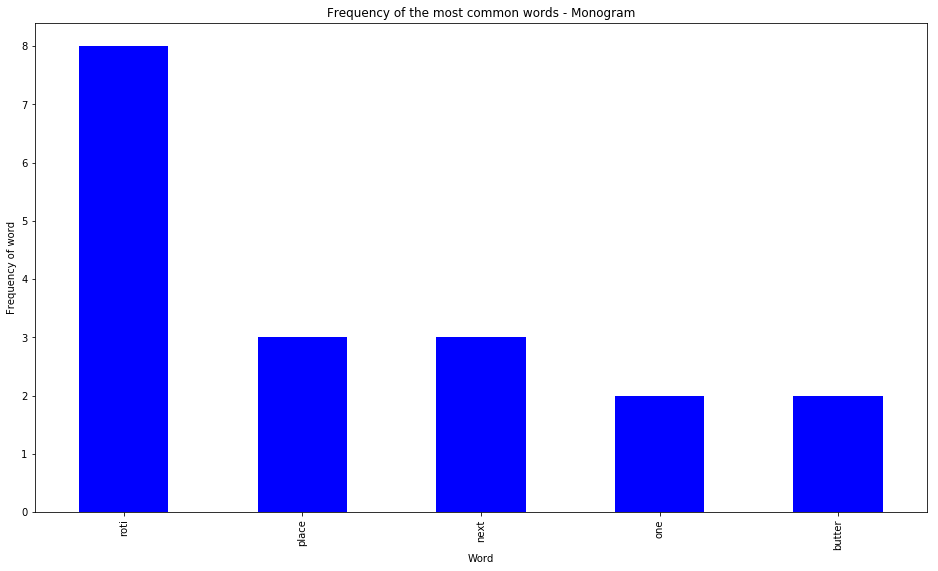

In [153]:
# Plot the frequency of the top 5 words
%matplotlib inline
import matplotlib.pyplot as plt

counts = count_frame.sort_values('Count', ascending = False)
fig = plt.figure(figsize=(16, 9))
ax = fig.gca()    
counts['Count'][:5].plot(kind = 'bar', ax = ax, color="blue")
ax.set_title('Frequency of the most common words - Monogram')
ax.set_ylabel('Frequency of word')
ax.set_xlabel('Word')
plt.show()

# Bigrams

In [155]:
import nltk
from nltk import word_tokenize
from nltk.util import ngrams

token=nltk.word_tokenize(article7Txt)
bigrams=ngrams(token,2)

In [156]:
#Frequency distribution of Bigrams into a dataframe
fdist = FreqDist(bigrams)
count_frame = pd.DataFrame(fdist, index = [0]).T
count_frame.columns = ['Count']
print (count_frame)

                         Count
get         roti             1
roti        1                2
1           toronto          1
toronto     next             1
next        week             2
week        roti             1
roti        always           1
always      cheap            1
cheap       filling          1
filling     delicious        1
delicious   ages             1
ages        since            1
since       youve            1
youve       able             1
able        get              1
get         prices           1
prices      low              1
low         say              1
say         dollar           1
dollar      prepare          1
prepare     double           1
double      take             1
take        roti             1
roti        place            1
place       serving          1
serving     roti             1
1           next             1
week        celebration      1
celebration one              1
one         year             1
...                        ...
however 

In [157]:
# Get the frequency distribution of the remaining bigrams
token=nltk.word_tokenize(article7Txt)
bigrams=ngrams(token,2)
fdist = FreqDist(bigrams)
count_frame = pd.DataFrame(fdist, index =[0]).T
count_frame.columns = ['Count']


Text(0.5, 1.0, 'Frequency of the most common Bigrams')

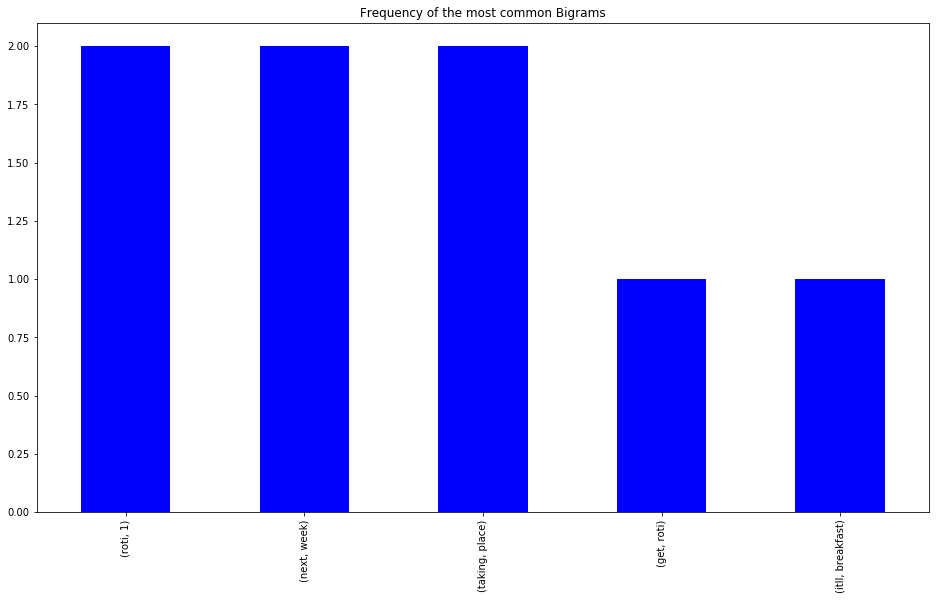

In [158]:
# Plot the frequency of the top 5 bigrams
%matplotlib inline
import matplotlib.pyplot as plt

counts = count_frame.sort_values('Count', ascending = False)
fig = plt.figure(figsize=(16, 9))
ax = fig.gca()    
counts['Count'][:5].plot(kind = 'bar', ax = ax, color="blue")
ax.set_title('Frequency of the most common Bigrams')

# Trigrams

In [159]:
import nltk
from nltk import word_tokenize
from nltk.util import ngrams

token=nltk.word_tokenize(article7Txt)
bigrams=ngrams(token,3)

In [160]:
#Frequency distribution of Bigrams into a dataframe
fdist = FreqDist(bigrams)
count_frame = pd.DataFrame(fdist, index = [0]).T
count_frame.columns = ['Count']
print (count_frame)

                                     Count
get         roti        1                1
roti        1           toronto          1
1           toronto     next             1
toronto     next        week             1
next        week        roti             1
week        roti        always           1
roti        always      cheap            1
always      cheap       filling          1
cheap       filling     delicious        1
filling     delicious   ages             1
delicious   ages        since            1
ages        since       youve            1
since       youve       able             1
youve       able        get              1
able        get         prices           1
get         prices      low              1
prices      low         say              1
low         say         dollar           1
say         dollar      prepare          1
dollar      prepare     double           1
prepare     double      take             1
double      take        roti             1
take       

In [161]:
# Get the frequency distribution of the remaining bigrams
token=nltk.word_tokenize(article7Txt)
bigrams=ngrams(token,3)
fdist = FreqDist(bigrams)
count_frame = pd.DataFrame(fdist, index =[0]).T
count_frame.columns = ['Count']

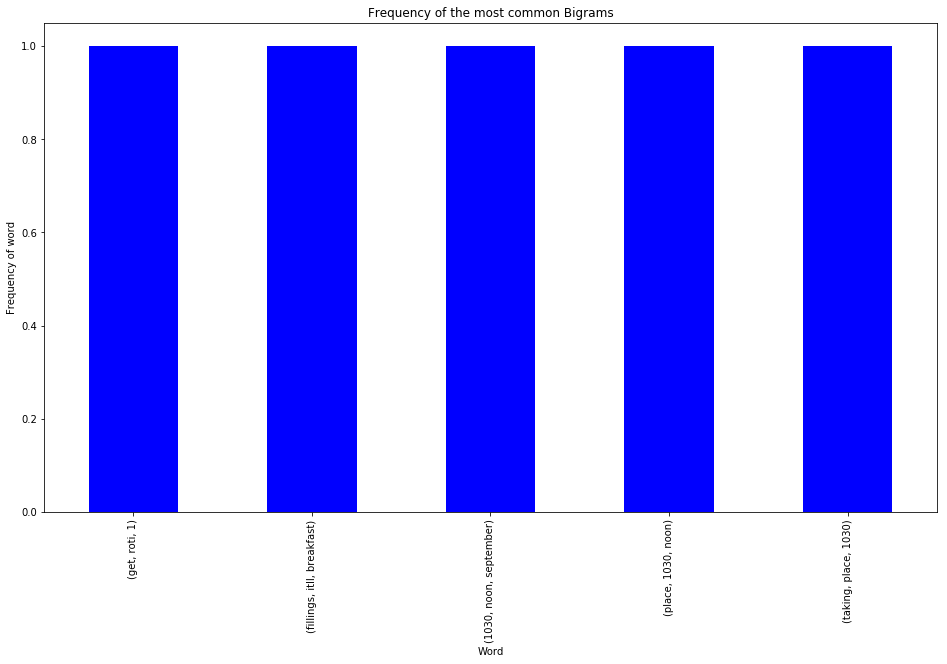

In [162]:
# Plot the frequency of the top 5 bigrams
%matplotlib inline
import matplotlib.pyplot as plt

counts = count_frame.sort_values('Count', ascending = False)
fig = plt.figure(figsize=(16, 9))
ax = fig.gca()    
counts['Count'][:5].plot(kind = 'bar', ax = ax, color="blue")
ax.set_title('Frequency of the most common Bigrams')
ax.set_ylabel('Frequency of word')
ax.set_xlabel('Word')
plt.show()

# Conclusions

Complication: Cannot reliably pull topics/location & business name into a CSV output file. Will have to find a more structured data source.
